## Preparing Datasets & Dependencies

In [1]:
# Paths
db_path = "/kaggle/input/metal-bind-predict/metalBindPredict/db/uniprot_data"
scripts_path = "/kaggle/input/metal-bind-predict/metalBindPredict/scripts"

In [2]:
conda install -c bioconda gtfparse

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gtfparse


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gtfparse-1.2.1             |     pyh864c0ab_0          13 KB  bioconda
    ------------------------------------------------------------
                                           Total:          13 KB

The following NEW packages will be INSTALLED:

  gtfparse           bioconda/noarch::gtfparse-1.2.1-pyh864c0ab_0



gtfparse-1.2.1       

In [3]:
# Dependencies
import os
import pandas as pd
import matplotlib as plt
import numpy as np
import sys
import gtfparse
import seaborn as sns

# global settings
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
os.chdir(db_path)
!ls

ChEBI-IDs_for_metal_binding.tsv  POS_TRAIN.tsv	       test-dataset.fasta
NEG_TRAIN.fasta			 POS_TRAIN_FULL.fasta  test.txt
POS_TRAIN.fasta			 POS_TRAIN_FULL.tsv


In [5]:
# function to read fasta files into dataframes
import pandas as pd
def read_fasta(file_name,file_path, columns) :
    from Bio.SeqIO.FastaIO import SimpleFastaParser 
    with open(file_name) as fasta_file:  
        records = [] # create empty list
        for title, sequence in SimpleFastaParser(fasta_file): #SimpleFastaParser Iterate over Fasta records as string tuples. For each record a tuple of two strings is returned, the FASTA title line (without the leading ‘>’ character), and the sequence (with any whitespace removed). 
            record = []
            title_splits=title.split('|') # Data cleaning is needed
            #print(title_splits)
                 
            
            record.append(title_splits[1])  #First values are ID (Append adds element to a list)
            record.append(len(sequence)) #Second values are sequences lengths
            record.append(title_splits[2]) #It converts into one line
            record.append(sequence)#Third values are sequences
            records.append(record)
    return pd.DataFrame(records, columns = columns) #We have created a function that returns a dataframe


## Exploring POS_TRAIN 

In [6]:
# exploring pos train fasta file
pos_train_fasta = read_fasta("POS_TRAIN.fasta",db_path, columns=["id","seq_length","info", "sequence"])
pos_train_fasta.head()

,id,seq_length,info,sequence
0,A0A023GPI8,237,LECA_CANBL Lectin alpha chain OS=Canavalia bol...,ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...
1,A0A067XG71,237,LECA_CANGR Lectin ConGF OS=Canavalia grandiflo...,ADTIVAVELDTYPNTDIGDPNYPHIGIDIKSIRSKKIAKWNMQDGK...
2,A0A084JZF2,303,UL28B_NONUL Ulvan lyase NLR48 OS=Nonlabens ulv...,MRKLKYNTTRVILMIAFISLSACSSEDAMIEEEQVIPDPDPVAQTD...
3,A0A096P8D3,470,"IDH_OSTTA Isocitrate dehydrogenase (NAD(+)), m...",MTRVERGRVLARAIERAVAHRASARRWTTTTRTPAWMVTGWMGGRG...
4,A0A0D4WV12,279,BIB11_SICTE Dermonecrotic toxin StSicTox-betaI...,GDSRRPIWNIAHMVNDLDLVDEYLDDGANSLELDVEFSKSGTALRT...


In [7]:
pos_train_tsv = pd.read_csv(db_path+'/POS_TRAIN.tsv', sep='\t', header=0)
pos_train_tsv.head()

,Accession,Evidence,ChEBI-ID,Position
0,Q8INK9,ECO:0000269,CHEBI:29105,157
1,Q8INK9,ECO:0000269,CHEBI:29105,96
2,Q1QT89,ECO:0000269,CHEBI:18420,263
3,P07327,ECO:0000269,CHEBI:29105,101
4,P07327,ECO:0007744,CHEBI:29105,104


In [8]:
pos_train_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18043 entries, 0 to 18042
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Accession  18043 non-null  object
 1   Evidence   18043 non-null  object
 2   ChEBI-ID   18043 non-null  object
 3   Position   18043 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 564.0+ KB


In [9]:
pos_train_df0 = pd.merge(pos_train_tsv, pos_train_fasta, left_on='Accession', right_on='id')
pos_train_df0 = pos_train_df0[['id','ChEBI-ID','Position','sequence']]
pos_train_df0.head()

,id,ChEBI-ID,Position,sequence
0,Q8INK9,CHEBI:29105,157,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
1,Q8INK9,CHEBI:29105,96,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
2,Q8INK9,CHEBI:29105,93,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
3,Q8INK9,CHEBI:29105,154,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
4,Q1QT89,CHEBI:18420,263,MKIRDAYTIVTCPGRNFVTLKIVTESGTHGIGDATLNGREMAVAAY...


In [10]:
# function to determine the amino acid that the binding happened at
pos_train_df0['binding_amino_acid'] = pos_train_df0.apply(
    lambda row: row.sequence[row.Position-1] , axis=1)

# function to determine the 
pos_train_df0.head()

,id,ChEBI-ID,Position,sequence,binding_amino_acid
0,Q8INK9,CHEBI:29105,157,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,C
1,Q8INK9,CHEBI:29105,96,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,C
2,Q8INK9,CHEBI:29105,93,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,C
3,Q8INK9,CHEBI:29105,154,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,C
4,Q1QT89,CHEBI:18420,263,MKIRDAYTIVTCPGRNFVTLKIVTESGTHGIGDATLNGREMAVAAY...,E


In [11]:
chebi_id_df = pd.read_csv(db_path+'/ChEBI-IDs_for_metal_binding.tsv', sep='\t', header=0)
chebi_id_df = chebi_id_df[['ChEBI-ID','Name']]
chebi_id_df.head()

,ChEBI-ID,Name
0,CHEBI:48775,Cd(2+)
1,CHEBI:29108,Ca(2+)
2,CHEBI:48828,Co(2+)
3,CHEBI:49415,Co(3+)
4,CHEBI:23378,Cu cation


In [12]:
pos_train_df1 = pd.merge(pos_train_df0, chebi_id_df, left_on='ChEBI-ID', right_on='ChEBI-ID')
pos_train_df1 = pos_train_df1[['id','Name','Position', 'binding_amino_acid','sequence']]
pos_train_df1 = pos_train_df1.rename(columns={"Name": "metal_name"})
pos_train_df1.head()

,id,metal_name,Position,binding_amino_acid,sequence
0,Q8INK9,Zn(2+),157,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
1,Q8INK9,Zn(2+),96,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
2,Q8INK9,Zn(2+),93,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
3,Q8INK9,Zn(2+),154,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...
4,P07327,Zn(2+),101,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...


In [13]:
pos_train_df1['Position'].describe()

count    18043.000000
mean       287.125644
std        422.697156
min          1.000000
25%         88.000000
50%        187.000000
75%        334.000000
max       5038.000000
Name: Position, dtype: float64

In [14]:
# checking for duplicates
pos_train_df1.duplicated().sum()

6056

Duplicates are result of having two evidences for the same observation! since we have dropped the evidence column, we have to drop the duplicate records.

In [15]:
# dropping duplicates 
pos_train_df1 = pos_train_df1.drop_duplicates()

# then checking again for duplicates
pos_train_df1.duplicated().sum()

0

In [16]:
# Getting part of the sequence before and after the binding amino acids with an offset of 3 amino acids
def window_3(Position,sequence):
    if Position <= 3:
        return sequence[:Position+3]
    if Position >= 5035:
        return sequence[Position-4:]
    else:
        return sequence[Position-4:Position+3]

pos_train_df1["window_3"] = pos_train_df1.apply(lambda row: window_3(row["Position"],row["sequence"]),

axis=1)

In [17]:
pos_train_df1['window_3'].describe()

count       11987
unique      10291
top       VELDTYP
freq           12
Name: window_3, dtype: object

In [18]:
# Getting part of the sequence before and after the binding amino acids with an offset of 10 amino acids
def window_10(Position,sequence):
    if Position <= 10:
        return sequence[:Position+10]
    if Position >= 5028:
        return sequence[Position-11:]
    else:
        return sequence[Position-11:Position+10]

pos_train_df1["window_10"] = pos_train_df1.apply(lambda row: window_10(row["Position"],row["sequence"]),

axis=1)

In [19]:
pos_train_df1.head()

,id,metal_name,Position,binding_amino_acid,sequence,window_3,window_10
0,Q8INK9,Zn(2+),157,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,CARCNAH,RIRTEVRCARCNAHMGHVFED
1,Q8INK9,Zn(2+),96,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,CIVCHQD,YEKGVYQCIVCHQDLFSSETK
2,Q8INK9,Zn(2+),93,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,VYQCIVC,NKHYEKGVYQCIVCHQDLFSS
3,Q8INK9,Zn(2+),154,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,EVRCARC,HPERIRTEVRCARCNAHMGHV
4,P07327,Zn(2+),101,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,CGKCRIC,IPLAIPQCGKCRICKNPESNY


In [20]:
# percentage of occurences of Metals
counts0_pos_train = pos_train_df1['metal_name'].value_counts(normalize=True)*100
counts0_pos_train

Zn(2+)                     31.817803
Ca(2+)                     25.210645
Mg(2+)                     12.596980
Mn(2+)                      6.256778
Fe cation                   5.339117
[4Fe-4S] cluster            5.030450
a divalent metal cation     3.812464
Cu cation                   3.578877
[2Fe-2S] cluster            2.135647
K(+)                        0.917661
Na(+)                       0.717444
Fe(3+)                      0.717444
Ni(2+)                      0.425461
Co(2+)                      0.325352
Cd(2+)                      0.266956
[3Fe-4S] cluster            0.175190
Cu(+)                       0.166847
Cu(2+)                      0.166847
Fe(2+)                      0.141820
[Ni-4Fe-4S] cluster         0.100108
[Ni-4Fe-5S] cluster         0.050054
Co(3+)                      0.033369
Hg(2+)                      0.016685
Name: metal_name, dtype: float64

The following metals are the most frequant to bind with the following percentages (%):

Zn(2+)   :                  31.817803

Ca(2+)   :                  25.210645

Mg(2+)   :                  12.596980

Mn(2+)   :                   6.256778



In [21]:
# top 10 protiens with highest number of binding sites
pos_train_df1['id'].value_counts().head(10)

Q10583    48
O31526    44
O31527    38
E0VIU9    32
Q868M7    31
Q51817    28
P45452    28
P19619    26
Q46085    26
P03956    24
Name: id, dtype: int64

In [22]:
#test: how many unique binding sites are there for O31526 protien
test1 = pos_train_df1[pos_train_df1['id'] == 'Q10583']
len(test1.Position.unique())

48

In [23]:
pos_train_df1.reset_index()

,index,id,metal_name,Position,binding_amino_acid,sequence,window_3,window_10
0,0,Q8INK9,Zn(2+),157,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,CARCNAH,RIRTEVRCARCNAHMGHVFED
1,1,Q8INK9,Zn(2+),96,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,CIVCHQD,YEKGVYQCIVCHQDLFSSETK
2,2,Q8INK9,Zn(2+),93,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,VYQCIVC,NKHYEKGVYQCIVCHQDLFSS
3,3,Q8INK9,Zn(2+),154,C,MFALSARHALRRTRIFAIPRFFADSRQDSDNPDKRYSGPAATMDNK...,EVRCARC,HPERIRTEVRCARCNAHMGHV
4,4,P07327,Zn(2+),101,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,CGKCRIC,IPLAIPQCGKCRICKNPESNY
...,...,...,...,...,...,...,...,...
11982,18038,O66188,Co(3+),131,C,MSADHDHDHDHDHDHKPAPMVEEVSDFEILEMAVRELAIEKGLFSA...,CTLCSCY,TLKHVVVCTLCSCYPRPILGQ
11983,18039,O66188,Co(3+),133,C,MSADHDHDHDHDHDHKPAPMVEEVSDFEILEMAVRELAIEKGLFSA...,LCSCYPR,KHVVVCTLCSCYPRPILGQSP
11984,18040,O66188,Co(3+),128,C,MSADHDHDHDHDHDHKPAPMVEEVSDFEILEMAVRELAIEKGLFSA...,VVVCTLC,DSPTLKHVVVCTLCSCYPRPI
11985,18041,P04129,Hg(2+),36,C,MKKLFASLALAAAVAPVWAATQTVTLAVPGMTCAACPITVKKALSK...,CAACPIT,LAVPGMTCAACPITVKKALSK


## Findings

In [24]:
#  frequancy percentage of having a binding site according to amino acid
counts1_pos_train = pos_train_df1['binding_amino_acid'].value_counts(normalize=True)*100
counts1_pos_train

C    25.027113
D    24.217903
H    22.357554
E    11.862851
N     3.770752
T     1.843664
G     1.785267
S     1.551681
Y     1.334779
K     0.934346
Q     0.859264
V     0.742471
L     0.709102
I     0.700759
A     0.650705
M     0.442146
R     0.425461
F     0.400434
W     0.241929
P     0.141820
Name: binding_amino_acid, dtype: float64

<AxesSubplot:xlabel='binding_amino_acid', ylabel='count'>

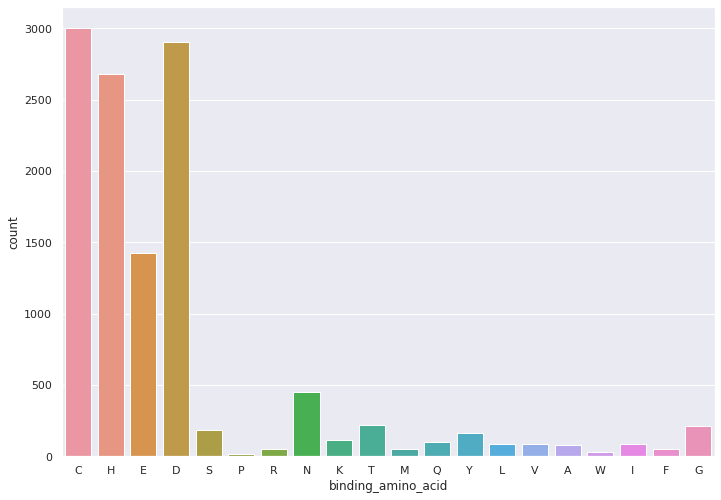

In [25]:
# plot for the previous counts
sns.countplot(x='binding_amino_acid', data=pos_train_df1)

The following amino acid are more likely to bind to metals than other amino acids with the following percentages:


C:    25.027113

D:    24.217903

H:    22.357554

E:    11.862851



In [26]:
# ranking the combinations between binding metals and amino acids and thier occurance count
list_amino_acids = []
temp_pos_train = pos_train_df1[~pos_train_df1.binding_amino_acid.isin(list_amino_acids)]

#pos_train_df1[pos_train_df1['Binding Amino Acid'] in ]
temp_pos_train = temp_pos_train.groupby(['binding_amino_acid', 'metal_name']).count().sort_values(['id'], ascending=False)
temp_pos_train = temp_pos_train.drop(['Position','window_3','window_10'], axis=1).rename(columns={'id':'metal_counts'}).reset_index()
#temp['metal_counts'] = temp['metal_counts'] /temp['metal_counts'].abs().max()
temp_pos_train

,binding_amino_acid,metal_name,metal_counts,sequence
0,C,Zn(2+),1799,1799
1,H,Zn(2+),1378,1378
2,D,Ca(2+),1231,1231
3,D,Mg(2+),754,754
4,C,[4Fe-4S] cluster,591,591
...,...,...,...,...
189,Q,Fe cation,1,1
190,Q,K(+),1,1
191,Q,Ni(2+),1,1
192,S,Co(2+),1,1


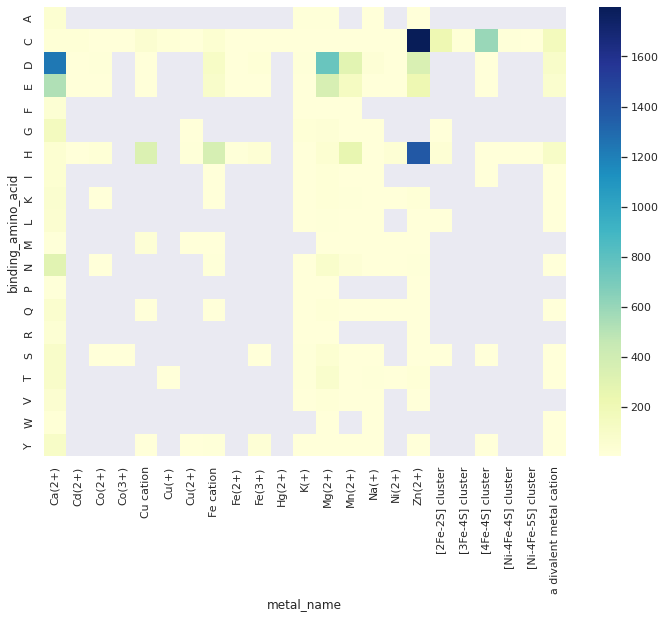

In [27]:
# Visualizing the combinations between binding metals and amino acids and thier occurance count
heatmap = temp_pos_train.pivot("binding_amino_acid", "metal_name", "metal_counts")
ax = sns.heatmap(heatmap , cmap="YlGnBu")

The previous heatmap combines the correlation and how likely you find a certian amino acid binding to a certian metal. There are some interesting insights coming out of this heat map:
* Metals: Ca(2+), K(+), Mg(2+), Mn(+), Na(+), and Zn(2+) can bind to more than 90 percent of the different amino acids. 
* Metal: Ca(2+) binds to all amino acids with a higher frequancy on (D, E).
* Amino Acid: C binds to all metals on the spectrum with more frequancy with Zn(2+) and [Ni-4Fe-4S] type.
* Metal Hg(2+) only binds to amino acid C


## Exploring POS_TRAIN_FULL

In [28]:
# exploring pos train fasta file
pos_train_full_fasta = read_fasta("POS_TRAIN_FULL.fasta",db_path, columns=["id","seq_length","info", "sequence"])
pos_train_full_fasta.head()

,id,seq_length,info,sequence
0,A0A023GPI8,237,LECA_CANBL Lectin alpha chain OS=Canavalia bol...,ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...
1,A0A023GS28,369,DIOX1_RUTGR Bi-functional coumaroyl CoA and fe...,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...
2,A0A023GS29,369,DIOX2_RUTGR Bi-functional coumaroyl CoA and fe...,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...
3,A0A023YYV9,326,NLEB2_ECOLR Protein-arginine N-acetylglucosami...,MLSPIRTTFHNSVNIVQSSPCQTVSFAGKEYELKVIDEKTPILFQW...
4,A0A024B7W1,3423,POLG_ZIKVF Genome polyprotein OS=Zika virus (i...,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...


In [29]:
ls

ChEBI-IDs_for_metal_binding.tsv  POS_TRAIN.tsv         test-dataset.fasta
NEG_TRAIN.fasta                  POS_TRAIN_FULL.fasta  test.txt
POS_TRAIN.fasta                  POS_TRAIN_FULL.tsv


In [30]:
pos_train_full_tsv = pd.read_csv(db_path+'/POS_TRAIN_FULL.tsv', sep='\t', header=0)
pos_train_full_tsv.head()

,Accession,Evidence,ChEBI-ID,Position
0,P0C6X8,ECO:0000255,CHEBI:29105,6190
1,P0C6X8,ECO:0000255,CHEBI:29105,6376
2,Q9RS27,ECO:0000255,CHEBI:29105,693
3,Q5HLY0,ECO:0000255,CHEBI:18420,97
4,Q9I2T1,ECO:0000255,CHEBI:29105,170


In [31]:
pos_train_full_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409989 entries, 0 to 409988
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Accession  409989 non-null  object
 1   Evidence   409989 non-null  object
 2   ChEBI-ID   409989 non-null  object
 3   Position   409989 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 12.5+ MB


In [32]:
pos_train_full_df0 = pd.merge(pos_train_full_tsv, pos_train_full_fasta, left_on='Accession', right_on='id')
pos_train_full_df0 = pos_train_full_df0[['id','ChEBI-ID','Position','sequence']]
pos_train_full_df0.head()

,id,ChEBI-ID,Position,sequence
0,P0C6X8,CHEBI:29105,6190,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
1,P0C6X8,CHEBI:29105,6376,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
2,P0C6X8,CHEBI:29105,5363,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
3,P0C6X8,CHEBI:29105,4355,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
4,P0C6X8,CHEBI:29105,4392,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...


In [33]:
# function to determine the amino acid that the binding happened at
pos_train_full_df0['binding_amino_acid'] = pos_train_full_df0.apply(
    lambda row: row.sequence[row.Position-1] , axis=1)

# function to determine the 
pos_train_full_df0.head()

,id,ChEBI-ID,Position,sequence,binding_amino_acid
0,P0C6X8,CHEBI:29105,6190,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,C
1,P0C6X8,CHEBI:29105,6376,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,C
2,P0C6X8,CHEBI:29105,5363,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,H
3,P0C6X8,CHEBI:29105,4355,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,C
4,P0C6X8,CHEBI:29105,4392,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,C


In [34]:
# checking for null values
pos_train_full_df0.isnull().sum()

id                    0
ChEBI-ID              0
Position              0
sequence              0
binding_amino_acid    0
dtype: int64

In [35]:
pos_train_full_df1 = pd.merge(pos_train_full_df0, chebi_id_df, left_on='ChEBI-ID', right_on='ChEBI-ID')
pos_train_full_df1 = pos_train_full_df1[['id','Name','Position', 'binding_amino_acid','sequence']]
pos_train_full_df1 = pos_train_full_df1.rename(columns={"Name": "metal_name"})
pos_train_full_df1.head()

,id,metal_name,Position,binding_amino_acid,sequence
0,P0C6X8,Zn(2+),6190,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
1,P0C6X8,Zn(2+),6376,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
2,P0C6X8,Zn(2+),5363,H,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
3,P0C6X8,Zn(2+),4355,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...
4,P0C6X8,Zn(2+),4392,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...


In [36]:
#  checking for duplicates
pos_train_full_df1.duplicated().sum()

10144

In [37]:
# dropping duplicates 
pos_train_full_df1 = pos_train_full_df1.drop_duplicates()

# then checking again for duplicates
pos_train_full_df1.duplicated().sum()

0

In [38]:
pos_train_full_df1['Position'].describe()

count    399845.000000
mean        254.259458
std         405.432395
min           1.000000
25%          82.000000
50%         165.000000
75%         288.000000
max        7257.000000
Name: Position, dtype: float64

In [39]:
# Getting part of the sequence before and after the binding amino acids with an offset of 3 amino acids
def window_3(Position,sequence):
    if Position <= 3:
        return sequence[:Position+3]
    if Position >= (7257-3):
        return sequence[Position-4:]
    else:
        return sequence[Position-4:Position+3]

pos_train_full_df1["window_3"] = pos_train_full_df1.apply(lambda row: window_3(row["Position"],row["sequence"]),

axis=1)

In [40]:
pos_train_full_df1['window_3'].describe()

count      399845
unique     108982
top       ADFDGDQ
freq          839
Name: window_3, dtype: object

In [41]:
# Getting part of the sequence before and after the binding amino acids with an offset of 10 amino acids
def window_10(Position,sequence):
    if Position <= 10:
        return sequence[:Position+10]
    if Position >= (7257-10):
        return sequence[Position-11:]
    else:
        return sequence[Position-11:Position+10]

pos_train_full_df1["window_10"] = pos_train_full_df1.apply(lambda row: window_10(row["Position"],row["sequence"]),

axis=1)

In [42]:
pos_train_full_df1.head()

,id,metal_name,Position,binding_amino_acid,sequence,window_3,window_10
0,P0C6X8,Zn(2+),6190,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,DLICSVH,GSLTSNHDLICSVHKGAHVAS
1,P0C6X8,Zn(2+),6376,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,DTPCVYM,MPFFYYSDTPCVYMEGMESKQ
2,P0C6X8,Zn(2+),5363,H,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,AYDHVMS,PLLCCKCAYDHVMSTDHKYVL
3,P0C6X8,Zn(2+),4355,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,DGLCKLR,RVEHPDVDGLCKLRGKFVQVP
4,P0C6X8,Zn(2+),4392,C,MAKMGKYGLGFKWAPEFPWMLPNASEKLGSPERSEEDGFCPSAAQE...,DGSCSCV,QVCGFWRDGSCSCVGTGSQFQ


## Findings

In [43]:
# percentage of occurences of Metals
counts_pos_full_1 = pos_train_full_df1['metal_name'].value_counts(normalize=True)*100
counts_pos_full_1

Zn(2+)                           32.690918
Mg(2+)                           22.102565
[4Fe-4S] cluster                 12.778202
Ca(2+)                            9.794045
Mn(2+)                            5.478873
a divalent metal cation           4.452475
Fe cation                         4.176869
[2Fe-2S] cluster                  2.196101
Cu cation                         1.810952
K(+)                              1.546599
Ni(2+)                            0.839575
Na(+)                             0.541210
Fe(3+)                            0.392402
iron-sulfur cluster               0.263602
Cu(2+)                            0.229589
Fe(2+)                            0.204579
[3Fe-4S] cluster                  0.122297
Cu(+)                             0.086784
Cd(2+)                            0.083782
Co(2+)                            0.053271
[8Fe-7S] cluster                  0.044017
a metal cation                    0.032763
[Ni-4Fe-4S] cluster               0.025510
Hg(2+)     

In [44]:
# top 10 protiens with highest number of binding sites
pos_train_df1['id'].value_counts().head(10)

Q10583    48
O31526    44
O31527    38
E0VIU9    32
Q868M7    31
Q51817    28
P45452    28
P19619    26
Q46085    26
P03956    24
Name: id, dtype: int64

In [45]:
#  frequancy percentage of having a binding site according to amino acid
counts_pos_full_2 = pos_train_full_df1['binding_amino_acid'].value_counts(normalize=True)*100
counts_pos_full_2

C    35.024822
D    22.518226
H    18.814040
E    11.883355
N     2.906876
S     2.130075
T     1.664645
G     1.176206
K     0.957371
Q     0.573472
Y     0.464180
I     0.337881
R     0.324626
L     0.311871
V     0.305869
A     0.234091
M     0.175818
F     0.113544
P     0.047018
W     0.033513
X     0.001501
U     0.001000
Name: binding_amino_acid, dtype: float64

<AxesSubplot:xlabel='binding_amino_acid', ylabel='count'>

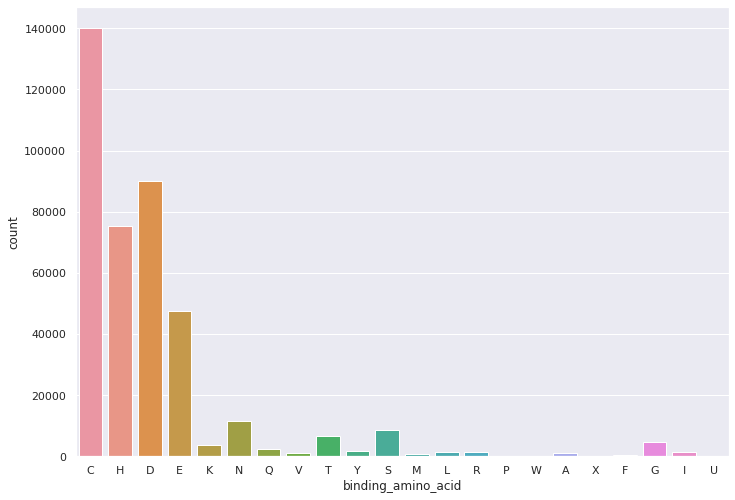

In [46]:
# plot for the previous counts
sns.countplot(x='binding_amino_acid', data=pos_train_full_df1)

In [47]:
# ranking the combinations between binding metals and amino acids and thier occurance count
list_amino_acids = []
temp_pos_train_full = pos_train_full_df1[~pos_train_full_df1.binding_amino_acid.isin(list_amino_acids)]

#pos_train_df1[pos_train_df1['Binding Amino Acid'] in ]
temp_pos_train_full = temp_pos_train_full.groupby(['binding_amino_acid', 'metal_name']).count().sort_values(['id'], ascending=False)
temp_pos_train_full = temp_pos_train_full.drop(['Position','window_3','window_10'], axis=1).rename(columns={'id':'metal_counts'}).reset_index()
#temp['metal_counts'] = temp['metal_counts'] /temp['metal_counts'].abs().max()
temp_pos_train_full

,binding_amino_acid,metal_name,metal_counts,sequence
0,C,Zn(2+),72787,72787
1,C,[4Fe-4S] cluster,49778,49778
2,D,Mg(2+),45125,45125
3,H,Zn(2+),42062,42062
4,E,Mg(2+),22721,22721
...,...,...,...,...
223,Q,Ni(2+),1,1
224,I,[4Fe-4S] cluster,1,1
225,V,a divalent metal cation,1,1
226,V,Zn(2+),1,1


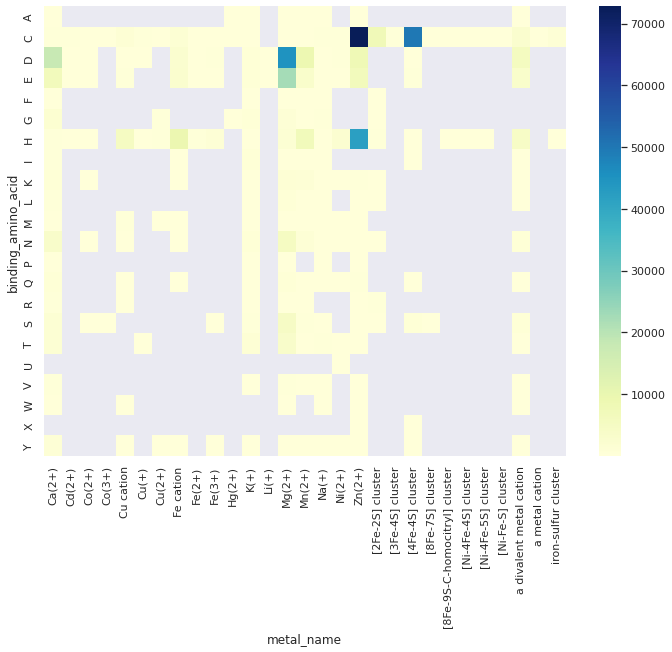

In [48]:
# Visualizing the combinations between binding metals and amino acids and thier occurance count
heatmap2 = temp_pos_train_full.pivot("binding_amino_acid", "metal_name", "metal_counts")
ax2 = sns.heatmap(heatmap2 , cmap="YlGnBu")

## Comparing both Full_POS_TRAIN and Full_POS datasets

Comparing counts of binding sites on all amino acids on both datasets



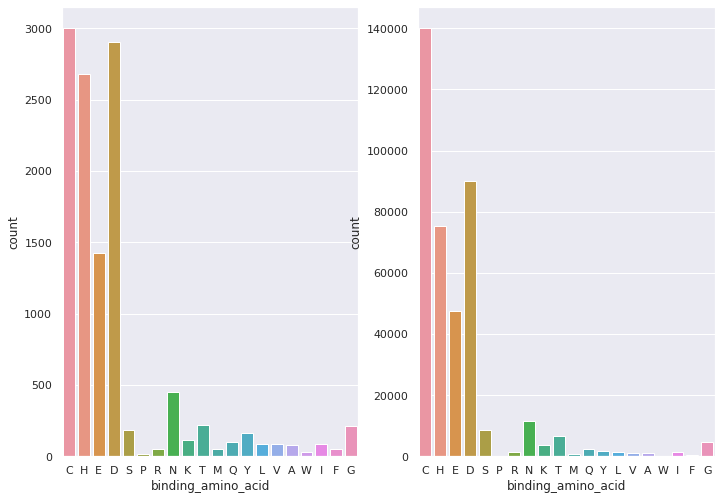

In [49]:
import matplotlib.pyplot as plt
amino_acids = list(pos_train_df1.binding_amino_acid.unique())
fig, ax = plt.subplots(1,2)
sns.countplot(x = pos_train_df1['binding_amino_acid'], ax=ax[0], data= pos_train_df1)
sns.countplot(x = pos_train_full_df1['binding_amino_acid'], ax=ax[1], data= pos_train_full_df1, order= amino_acids)
fig.show()

Comparing frequancy of metals on both datasets

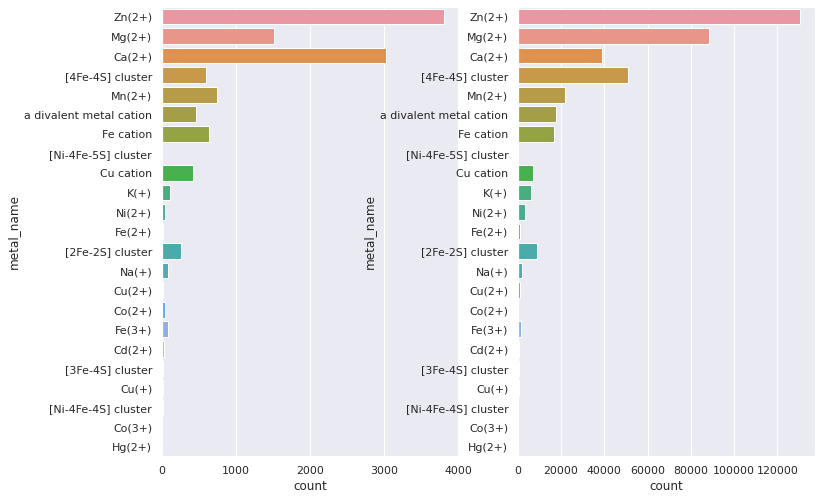

In [50]:

import matplotlib.pyplot as plt
metals = list(pos_train_df1.metal_name.unique())
amino_acids = list(pos_train_df1.binding_amino_acid.unique())
fig, ax = plt.subplots(1,2)
sns.countplot(y = pos_train_df1['metal_name'], ax=ax[0], data= pos_train_df1, orient = "h", order = metals)
sns.countplot(y = pos_train_full_df1['metal_name'], ax=ax[1], data= pos_train_full_df1, orient= "h", order = metals)
fig.show()

## Exploring NEG_TRAIN

In [51]:
# exploring neg train fasta file
neg_train_df = read_fasta("NEG_TRAIN.fasta",db_path, columns=["id","seq_length","info", "sequence"])
neg_train_df.head()

,id,seq_length,info,sequence
0,A0A075B6S6,120,KVD30_HUMAN Immunoglobulin kappa variable 2D-3...,MRLPAQLLGLLMLWVPGSSGDVVMTQSPLSLPVTLGQPASISCRSS...
1,A0A0K0IP23,161,CPI2_BRUMA Cystatin cpi-2 OS=Brugia malayi OX=...,MMSTMSIKEGLLVILLSLFLFDTTALIHRREIPHMESKGQMQRGQV...
2,A3DA80,365,TRMA_SHEB5 tRNA/tmRNA (uracil-C(5))-methyltran...,MNLAAMDPQTYDTQLEHKRIKLEQAFAQFETPSVEVFASEPANYRM...
3,A3KGV1,830,ODFP2_MOUSE Outer dense fiber protein 2 OS=Mus...,MSASSSGGSPRFPSCGKNGVTSLTQKKVLRTPCGAPSVTVTKSHKR...
4,A3MRU9,126,RS12_BURM7 30S ribosomal protein S12 OS=Burkho...,MPTINQLVRKGRASETTKSKSPALQDCPQRRGVCTRVYTTTPKKPN...


In [52]:
neg_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193133 entries, 0 to 193132
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          193133 non-null  object
 1   seq_length  193133 non-null  int64 
 2   info        193133 non-null  object
 3   sequence    193133 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


In [53]:
neg_train_df = neg_train_df.drop(columns=['sequence', 'info','seq_length'])

In [54]:
neg_train_df

,id
0,A0A075B6S6
1,A0A0K0IP23
2,A3DA80
3,A3KGV1
4,A3MRU9
...,...
193128,Q9VSE2
193129,Q9VV87
193130,Q9VZU4
193131,Q9W133


In [55]:
# Checking if there are any proteins both in the POS and NEG trainning sets
matches = []
for i in pos_train_full_df1.id:
    if i in neg_train_df.id:
        matches.append(i)
if len(matches) == 0: 
    print("There are not matches!")
else:
    print(matches)

There are not matches!


## Exploring only observations with Evidence: ECO:0000269 (Extracted from literature by Curators)

In [56]:
pos_train_lit_based = pd.merge(pos_train_full_tsv, pos_train_full_fasta, left_on='Accession', right_on='id')
pos_train_lit_based = pos_train_lit_based[['id','ChEBI-ID', 'Evidence','Position','sequence']]
pos_train_lit_based.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409989 entries, 0 to 409988
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        409989 non-null  object
 1   ChEBI-ID  409989 non-null  object
 2   Evidence  409989 non-null  object
 3   Position  409989 non-null  int64 
 4   sequence  409989 non-null  object
dtypes: int64(1), object(4)
memory usage: 18.8+ MB


In [57]:
pos_train_lit_based=pos_train_lit_based[pos_train_lit_based['Evidence']=='ECO:0000269']
pos_train_lit_based = pos_train_lit_based.drop(columns=['Evidence'])
pos_train_lit_based.head()

,id,ChEBI-ID,Position,sequence
52,Q8C6L5,CHEBI:29105,385,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
53,Q8C6L5,CHEBI:18420,213,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
56,Q8C6L5,CHEBI:18420,211,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
57,Q8C6L5,CHEBI:29105,392,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
58,Q8C6L5,CHEBI:18420,307,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...


In [58]:
# function to determine the amino acid that the binding happened at
pos_train_lit_based['binding_amino_acid'] = pos_train_lit_based.apply(
    lambda row: row.sequence[row.Position-1] , axis=1)

# function to determine the 
pos_train_lit_based.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11169 entries, 52 to 409938
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11169 non-null  object
 1   ChEBI-ID            11169 non-null  object
 2   Position            11169 non-null  int64 
 3   sequence            11169 non-null  object
 4   binding_amino_acid  11169 non-null  object
dtypes: int64(1), object(4)
memory usage: 523.5+ KB


In [59]:
pos_train_lit_based = pd.merge(pos_train_lit_based, chebi_id_df, left_on='ChEBI-ID', right_on='ChEBI-ID')
pos_train_lit_based = pos_train_lit_based[['id','Name','Position', 'binding_amino_acid','sequence']]
pos_train_lit_based = pos_train_lit_based.rename(columns={"Name": "metal_name"})
pos_train_lit_based.head()

,id,metal_name,Position,binding_amino_acid,sequence
0,Q8C6L5,Zn(2+),385,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
1,Q8C6L5,Zn(2+),392,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
2,Q8C6L5,Zn(2+),378,H,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
3,Q8C6L5,Zn(2+),384,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
4,P07505,Zn(2+),148,H,MAAHTILASAPSHTTFSLISPFSSTPTNALSSSLQSSSFNGLSFKL...


In [60]:
#  checking for duplicates
pos_train_lit_based.duplicated().sum()

0

In [61]:
pos_train_lit_based['Position'].describe()

count    11169.000000
mean       279.130003
std        410.904162
min          1.000000
25%         90.000000
50%        185.000000
75%        322.000000
max       5038.000000
Name: Position, dtype: float64

In [62]:
# Getting part of the sequence before and after the binding amino acids with an offset of 3 amino acids
def window_3(Position,sequence):
    if Position <= 3:
        return sequence[:Position+3]
    if Position >= (5038-3):
        return sequence[Position-4:]
    else:
        return sequence[Position-4:Position+3]

pos_train_lit_based["window_3"] = pos_train_lit_based.apply(lambda row: window_3(row["Position"],row["sequence"]),

axis=1)

In [63]:
pos_train_lit_based['window_3'].describe()

count       11169
unique       9638
top       GAGMVGK
freq           12
Name: window_3, dtype: object

In [64]:
# Getting part of the sequence before and after the binding amino acids with an offset of 10 amino acids
def window_10(Position,sequence):
    if Position <= 10:
        return sequence[:Position+10]
    if Position >= (5038-10):
        return sequence[Position-11:]
    else:
        return sequence[Position-11:Position+10]

pos_train_lit_based["window_10"] = pos_train_lit_based.apply(lambda row: window_10(row["Position"],row["sequence"]),

axis=1)

In [65]:
pos_train_lit_based.head()

,id,metal_name,Position,binding_amino_acid,sequence,window_3,window_10
0,Q8C6L5,Zn(2+),385,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,KTCCESS,LNNHGIEKTCCESSGAKCCRK
1,Q8C6L5,Zn(2+),392,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,GAKCCRK,KTCCESSGAKCCRKECLKLMK
2,Q8C6L5,Zn(2+),378,H,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,LNNHGIE,SHTEKYILNNHGIEKTCCESS
3,Q8C6L5,Zn(2+),384,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,EKTCCES,ILNNHGIEKTCCESSGAKCCR
4,P07505,Zn(2+),148,H,MAAHTILASAPSHTTFSLISPFSSTPTNALSSSLQSSSFNGLSFKL...,EVRHAGD,THGAPEDEVRHAGDLGNIVAN


## Findings

In [66]:
# percentage of occurences of Metals
counts_lit_based_1 = pos_train_lit_based['metal_name'].value_counts(normalize=True)*100
counts_lit_based_1

Zn(2+)                     31.676963
Ca(2+)                     24.478467
Mg(2+)                     12.901782
Mn(2+)                      6.437461
Fe cation                   5.479452
[4Fe-4S] cluster            5.398872
a divalent metal cation     3.858895
Cu cation                   3.285881
[2Fe-2S] cluster            2.175665
K(+)                        0.984869
Fe(3+)                      0.734175
Na(+)                       0.671501
Ni(2+)                      0.456621
Co(2+)                      0.322321
Cd(2+)                      0.286507
[3Fe-4S] cluster            0.188020
Cu(2+)                      0.179067
Cu(+)                       0.179067
Fe(2+)                      0.125347
[Ni-4Fe-4S] cluster         0.107440
[Ni-4Fe-5S] cluster         0.053720
Hg(2+)                      0.017907
Name: metal_name, dtype: float64

In [67]:
# top 10 protiens with highest number of binding sites
pos_train_lit_based['id'].value_counts().head(10)

O31526    44
O31527    38
E0VIU9    32
Q868M7    31
Q51817    28
P45452    28
Q46085    26
O75592    24
P03956    24
Q9NQV7    24
Name: id, dtype: int64

In [68]:
#  frequancy percentage of having a binding site according to amino acid
counts_lit_based_2 = pos_train_lit_based['binding_amino_acid'].value_counts(normalize=True)*100
counts_lit_based_2

C    25.167875
D    24.371027
H    22.365476
E    11.737846
N     3.796222
T     1.835437
G     1.763811
S     1.611604
Y     1.325096
K     0.913242
Q     0.787895
V     0.752082
I     0.689408
A     0.635688
L     0.626735
M     0.438714
R     0.411854
F     0.367087
W     0.259647
P     0.143254
Name: binding_amino_acid, dtype: float64

<AxesSubplot:xlabel='binding_amino_acid', ylabel='count'>

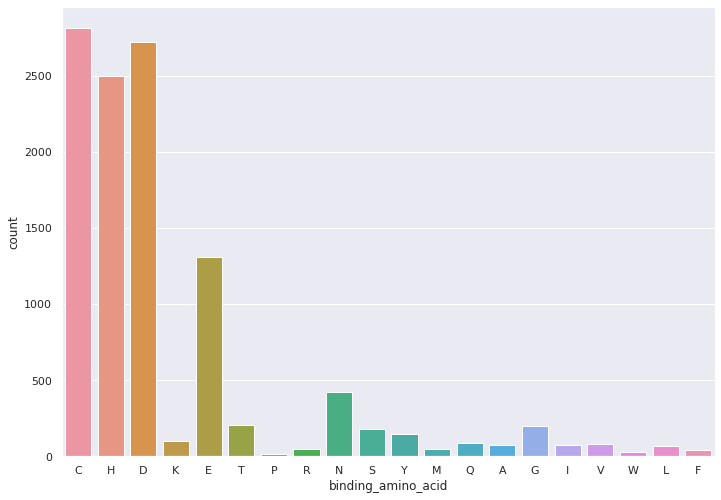

In [69]:
# plot for the previous counts
sns.countplot(x='binding_amino_acid', data=pos_train_lit_based)

In [70]:
# ranking the combinations between binding metals and amino acids and thier occurance count
list_amino_acids = []
pos_train_lit_based_temp = pos_train_lit_based[~pos_train_lit_based.binding_amino_acid.isin(list_amino_acids)]

#pos_train_df1[pos_train_df1['Binding Amino Acid'] in ]
pos_train_lit_based_temp = pos_train_lit_based_temp.groupby(['binding_amino_acid', 'metal_name']).count().sort_values(['id'], ascending=False)
pos_train_lit_based_temp = pos_train_lit_based_temp.drop(['Position','window_3','window_10'], axis=1).rename(columns={'id':'metal_counts'}).reset_index()
#temp['metal_counts'] = temp['metal_counts'] /temp['metal_counts'].abs().max()
pos_train_lit_based_temp

,binding_amino_acid,metal_name,metal_counts,sequence
0,C,Zn(2+),1631,1631
1,H,Zn(2+),1305,1305
2,D,Ca(2+),1138,1138
3,D,Mg(2+),708,708
4,C,[4Fe-4S] cluster,591,591
...,...,...,...,...
185,K,K(+),1,1
186,K,Fe cation,1,1
187,T,Cu(+),1,1
188,K,Co(2+),1,1


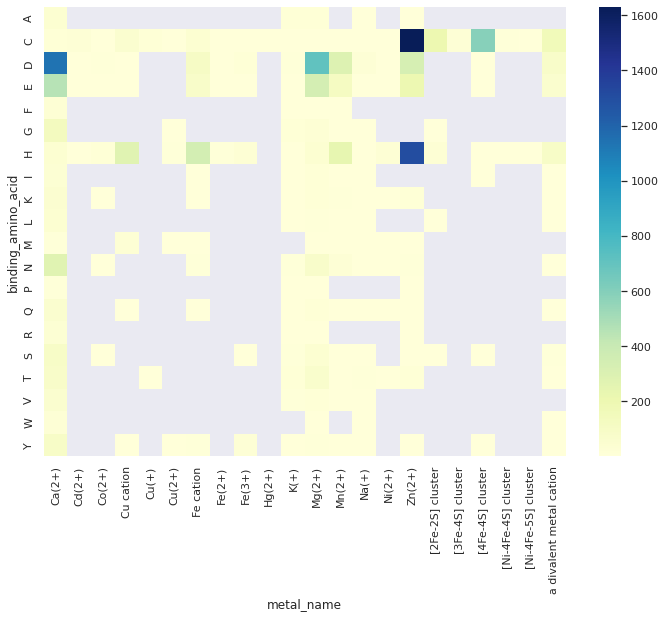

In [71]:
# Visualizing the combinations between binding metals and amino acids and thier occurance count
heatmap2 = pos_train_lit_based_temp.pivot("binding_amino_acid", "metal_name", "metal_counts")
ax2 = sns.heatmap(heatmap2 , cmap="YlGnBu")

<AxesSubplot:xlabel='Metal names', ylabel='Percentage (%)'>

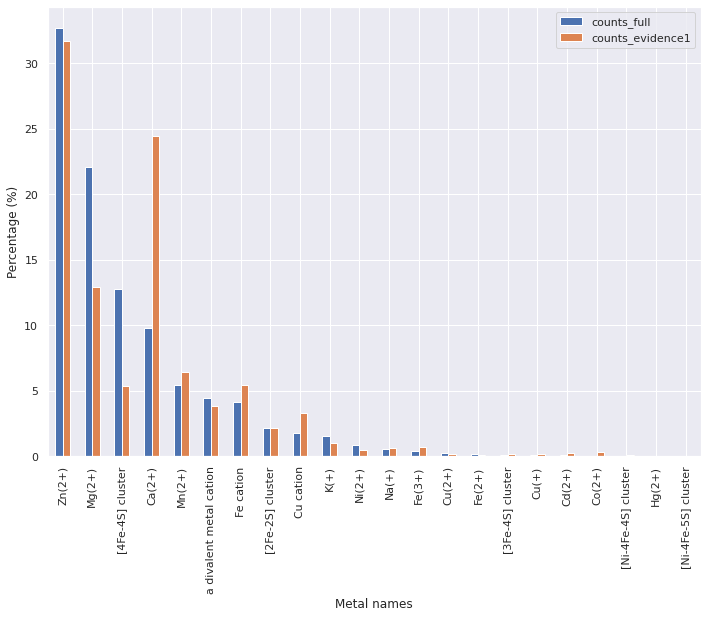

In [72]:
# Plotting the occurences of metals for the full pos dataset and observations with literature evidence
pd.DataFrame(counts_pos_full_1).reset_index().merge(
    pd.DataFrame(counts_lit_based_1).reset_index(), right_on='index', left_on='index').rename(columns={
    'index': 'metal_name', 'metal_name_x': 'counts_full','metal_name_y':'counts_evidence1'}).plot(
        x="metal_name", y=["counts_full", "counts_evidence1"], kind="bar", xlabel= 'Metal names', ylabel= "Percentage (%)")


<AxesSubplot:xlabel='binding_amino_acids names', ylabel='Percentage (%)'>

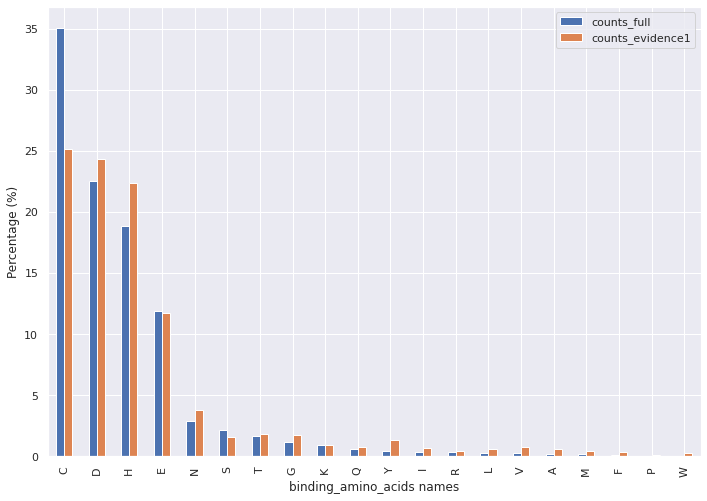

In [73]:
# Plotting the frequancy of binding sites for the full pos dataset and observations with literature evidence
pd.DataFrame(counts_pos_full_2).reset_index().merge(
    pd.DataFrame(counts_lit_based_2).reset_index(), right_on='index', left_on='index').rename(columns={
    'index': 'binding_amino_acid', 'binding_amino_acid_x': 'counts_full','binding_amino_acid_y':'counts_evidence1'}).plot(
        x="binding_amino_acid", y=["counts_full", "counts_evidence1"], kind="bar", xlabel= 'binding_amino_acids names', ylabel= "Percentage (%)")


Through observing the differences between the full dataset and the dataset only based on literature evidence:
* Metal Findings:

    * Ca(+2) appears to be well documented through literture as the (orange column) far exceeds the (blue column)
    * [4Fe-4S] and Mg(2+) claims to be present more in the full_pos dataset. However, according to literture, their presence is less likely.
    * Other metals are close in precentages to be a binding ligand
    
* Amino Acid Findings:

    * C is claimed to be more likely to appear in the full dataset, however a 10% reduction has happened when only considering literature.
    * All other amino acids seem to have consistent results when comparing both dataset with a slight increase in favor of the literture.

## Comparing residue-ligand distribution between the instances having (literature-based evidence, computer-predicted evidence, and both evidences)

In [74]:
pos_train_comp_based = pd.merge(pos_train_full_tsv, pos_train_full_fasta, left_on='Accession', right_on='id')
pos_train_comp_based = pos_train_comp_based[['id','ChEBI-ID', 'Evidence','Position','sequence']]
pos_train_comp_based.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409989 entries, 0 to 409988
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        409989 non-null  object
 1   ChEBI-ID  409989 non-null  object
 2   Evidence  409989 non-null  object
 3   Position  409989 non-null  int64 
 4   sequence  409989 non-null  object
dtypes: int64(1), object(4)
memory usage: 18.8+ MB


In [75]:
pos_train_comp_based.Evidence.unique()

array(['ECO:0000255', 'ECO:0000269', 'ECO:0007744', 'ECO:0000250',
       'ECO:0000305', 'ECO:0000312', 'ECO:0000303'], dtype=object)

In [76]:
pos_train_comp_based =pos_train_comp_based[pos_train_comp_based['Evidence']=='ECO:0007744']
pos_train_comp_based = pos_train_comp_based.drop(columns=['Evidence'])
pos_train_comp_based.head()

,id,ChEBI-ID,Position,sequence
54,Q8C6L5,CHEBI:29105,384,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
55,Q8C6L5,CHEBI:29105,392,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
61,Q8C6L5,CHEBI:29105,378,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
62,Q8C6L5,CHEBI:29105,385,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
238,A3DBH1,CHEBI:29108,456,MNRLGIIYEIQGMKAVVLTSEGEFLIIRRRKDMKVGQQVSFENEDI...


In [77]:
pos_train_comp_based.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6874 entries, 54 to 405914
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6874 non-null   object
 1   ChEBI-ID  6874 non-null   object
 2   Position  6874 non-null   int64 
 3   sequence  6874 non-null   object
dtypes: int64(1), object(3)
memory usage: 268.5+ KB


In [78]:
# function to determine the amino acid that the binding happened at
pos_train_comp_based['binding_amino_acid'] = pos_train_comp_based.apply(
    lambda row: row.sequence[row.Position-1] , axis=1)

# function to determine the 
pos_train_comp_based.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6874 entries, 54 to 405914
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  6874 non-null   object
 1   ChEBI-ID            6874 non-null   object
 2   Position            6874 non-null   int64 
 3   sequence            6874 non-null   object
 4   binding_amino_acid  6874 non-null   object
dtypes: int64(1), object(4)
memory usage: 322.2+ KB


In [79]:
pos_train_comp_based = pd.merge(pos_train_comp_based, chebi_id_df, left_on='ChEBI-ID', right_on='ChEBI-ID')
pos_train_comp_based = pos_train_comp_based[['id','Name','Position', 'binding_amino_acid','sequence']]
pos_train_comp_based = pos_train_comp_based.rename(columns={"Name": "metal_name"})
pos_train_comp_based.head()

,id,metal_name,Position,binding_amino_acid,sequence
0,Q8C6L5,Zn(2+),384,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
1,Q8C6L5,Zn(2+),392,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
2,Q8C6L5,Zn(2+),378,H,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
3,Q8C6L5,Zn(2+),385,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...
4,Q8U082,Zn(2+),76,C,MGEKRKTRQAEVNIGMVGHVDHGKTTLTKALTGVWTDTHSEELRRG...


In [80]:
#  checking for duplicates
pos_train_comp_based.duplicated().sum()

0

In [81]:
pos_train_comp_based['Position'].describe()

count    6874.000000
mean      300.117108
std       440.908278
min         1.000000
25%        86.000000
50%       191.000000
75%       352.000000
max      5001.000000
Name: Position, dtype: float64

In [82]:
# Getting part of the sequence before and after the binding amino acids with an offset of 3 amino acids
def window_3(Position,sequence):
    if Position <= 3:
        return sequence[:Position+3]
    if Position >= (5001-3):
        return sequence[Position-4:]
    else:
        return sequence[Position-4:Position+3]

pos_train_comp_based["window_3"] = pos_train_comp_based.apply(lambda row: window_3(row["Position"],row["sequence"]),

axis=1)

In [83]:
pos_train_comp_based['window_3'].describe()

count        6874
unique       5979
top       QVHDNCY
freq            9
Name: window_3, dtype: object

In [84]:
# Getting part of the sequence before and after the binding amino acids with an offset of 10 amino acids
def window_10(Position,sequence):
    if Position <= 10:
        return sequence[:Position+10]
    if Position >= (5038-10):
        return sequence[Position-11:]
    else:
        return sequence[Position-11:Position+10]

pos_train_comp_based["window_10"] = pos_train_comp_based.apply(lambda row: window_10(row["Position"],row["sequence"]),

axis=1)

In [85]:
pos_train_comp_based.head()

,id,metal_name,Position,binding_amino_acid,sequence,window_3,window_10
0,Q8C6L5,Zn(2+),384,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,EKTCCES,ILNNHGIEKTCCESSGAKCCR
1,Q8C6L5,Zn(2+),392,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,GAKCCRK,KTCCESSGAKCCRKECLKLMK
2,Q8C6L5,Zn(2+),378,H,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,LNNHGIE,SHTEKYILNNHGIEKTCCESS
3,Q8C6L5,Zn(2+),385,C,MEDPRRRTTAPRAKKPSAKRAPTQPSRTRAHAESCGPQRGARSRRA...,KTCCESS,LNNHGIEKTCCESSGAKCCRK
4,Q8U082,Zn(2+),76,C,MGEKRKTRQAEVNIGMVGHVDHGKTTLTKALTGVWTDTHSEELRRG...,CPYCGHE,RYSTSPICPYCGHETEFIRRV


## Findings

In [86]:
# percentage of occurences of Metals
counts_comp_based_1 = pos_train_comp_based['metal_name'].value_counts(normalize=True)*100
counts_comp_based_1

Zn(2+)                     32.732034
Ca(2+)                     29.589759
Mg(2+)                     10.168752
Mn(2+)                      6.066337
Fe cation                   4.466104
a divalent metal cation     4.466104
[4Fe-4S] cluster            4.102415
Cu cation                   2.822229
[2Fe-2S] cluster            1.527495
Na(+)                       0.974687
Fe(3+)                      0.785569
K(+)                        0.771021
Ni(2+)                      0.378237
Cd(2+)                      0.261856
[3Fe-4S] cluster            0.218214
Co(2+)                      0.203666
Cu(2+)                      0.189118
Fe(2+)                      0.116381
Cu(+)                       0.101833
Co(3+)                      0.058190
Name: metal_name, dtype: float64

In [87]:
# top 10 protiens with highest number of binding sites
pos_train_comp_based['id'].value_counts().head(10)

Q10583    48
O31526    44
O31527    38
E0VIU9    32
Q868M7    31
Q51817    28
Q46085    26
P19619    26
Q9NQV7    24
O75592    24
Name: id, dtype: int64

In [88]:
#  frequancy percentage of having a binding site according to amino acid
counts_comp_based_2 = pos_train_comp_based['binding_amino_acid'].value_counts(normalize=True)*100
counts_comp_based_2

C    25.501891
D    24.454466
H    20.555717
E    11.725342
N     4.058772
G     1.934827
T     1.934827
S     1.658423
Y     1.469305
K     1.105615
Q     0.931045
L     0.843759
V     0.814664
I     0.756474
A     0.625546
R     0.538260
F     0.494617
M     0.305499
W     0.203666
P     0.087285
Name: binding_amino_acid, dtype: float64

<AxesSubplot:xlabel='binding_amino_acid', ylabel='count'>

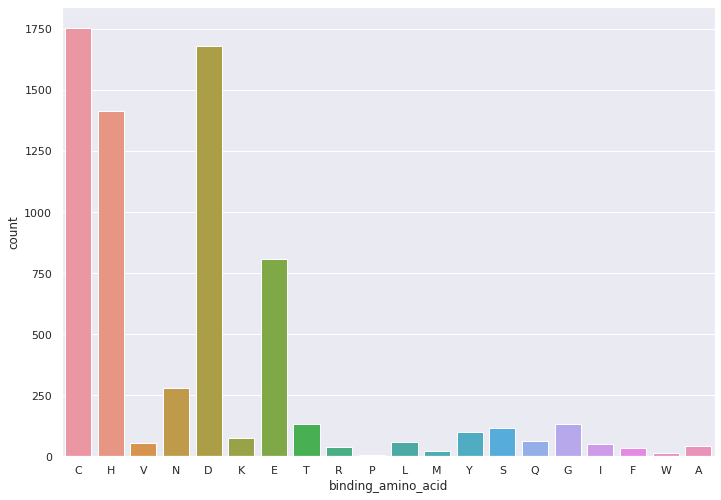

In [89]:
# plot for the previous counts
sns.countplot(x='binding_amino_acid', data=pos_train_comp_based)

In [90]:
# ranking the combinations between binding metals and amino acids and thier occurance count
list_amino_acids = []
pos_train_comp_based_temp = pos_train_comp_based[~pos_train_comp_based.binding_amino_acid.isin(list_amino_acids)]

#pos_train_df1[pos_train_df1['Binding Amino Acid'] in ]
pos_train_comp_based_temp = pos_train_comp_based_temp.groupby(['binding_amino_acid', 'metal_name']).count().sort_values(['id'], ascending=False)
pos_train_comp_based_temp = pos_train_comp_based_temp.drop(['Position','window_3','window_10'], axis=1).rename(columns={'id':'metal_counts'}).reset_index()
#temp['metal_counts'] = temp['metal_counts'] /temp['metal_counts'].abs().max()
pos_train_comp_based_temp

,binding_amino_acid,metal_name,metal_counts,sequence
0,C,Zn(2+),1140,1140
1,D,Ca(2+),814,814
2,H,Zn(2+),729,729
3,E,Ca(2+),361,361
4,D,Mg(2+),350,350
...,...,...,...,...
156,P,Zn(2+),1,1
157,Q,Fe cation,1,1
158,Q,Na(+),1,1
159,S,Co(3+),1,1


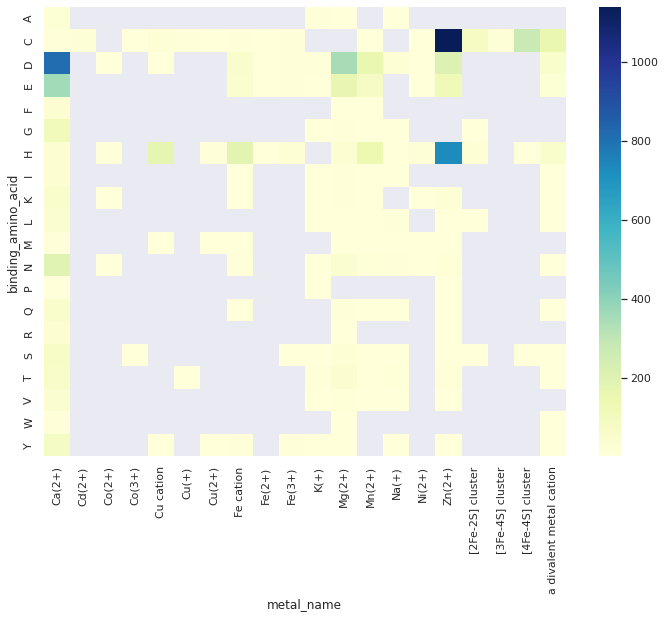

In [91]:
# Visualizing the combinations between binding metals and amino acids and thier occurance count
heatmap2 = pos_train_comp_based_temp.pivot("binding_amino_acid", "metal_name", "metal_counts")
ax2 = sns.heatmap(heatmap2 , cmap="YlGnBu")

## Dataset combining both evidences

In [92]:
pos_train_both_based = pd.merge(pos_train_tsv, pos_train_fasta, left_on='Accession', right_on='id')
pos_train_both_based = pos_train_both_based[['id','ChEBI-ID','Position','sequence']]
pos_train_both_based.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18043 entries, 0 to 18042
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        18043 non-null  object
 1   ChEBI-ID  18043 non-null  object
 2   Position  18043 non-null  int64 
 3   sequence  18043 non-null  object
dtypes: int64(1), object(3)
memory usage: 704.8+ KB


In [93]:
pos_train_both_based = pos_train_both_based[pos_train_both_based.duplicated()]
pos_train_both_based.head()

,id,ChEBI-ID,Position,sequence
13,P07327,CHEBI:29105,47,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
14,P07327,CHEBI:29105,112,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
15,P07327,CHEBI:29105,101,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
17,P07327,CHEBI:29105,68,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
18,P07327,CHEBI:29105,175,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...


In [94]:
# function to determine the amino acid that the binding happened at
pos_train_both_based['binding_amino_acid'] = pos_train_both_based.apply(
    lambda row: row.sequence[row.Position-1] , axis=1)

# function to determine the 
pos_train_both_based.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 13 to 18025
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  6056 non-null   object
 1   ChEBI-ID            6056 non-null   object
 2   Position            6056 non-null   int64 
 3   sequence            6056 non-null   object
 4   binding_amino_acid  6056 non-null   object
dtypes: int64(1), object(4)
memory usage: 283.9+ KB


In [95]:
pos_train_both_based = pd.merge(pos_train_both_based, chebi_id_df, left_on='ChEBI-ID', right_on='ChEBI-ID')
pos_train_both_based = pos_train_both_based[['id','Name','Position', 'binding_amino_acid','sequence']]
pos_train_both_based = pos_train_both_based.rename(columns={"Name": "metal_name"})
pos_train_both_based.head()

,id,metal_name,Position,binding_amino_acid,sequence
0,P07327,Zn(2+),47,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
1,P07327,Zn(2+),112,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
2,P07327,Zn(2+),101,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
3,P07327,Zn(2+),68,H,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...
4,P07327,Zn(2+),175,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...


In [96]:
#  checking for duplicates
pos_train_both_based.duplicated().sum()

0

In [97]:
pos_train_both_based['Position'].describe()

count    6056.000000
mean      278.220773
std       406.732770
min         1.000000
25%        83.000000
50%       183.000000
75%       336.000000
max      4672.000000
Name: Position, dtype: float64

In [98]:
# Getting part of the sequence before and after the binding amino acids with an offset of 3 amino acids
def window_3(Position,sequence):
    if Position <= 3:
        return sequence[:Position+3]
    if Position >= (4672-3):
        return sequence[Position-4:]
    else:
        return sequence[Position-4:Position+3]

pos_train_both_based["window_3"] = pos_train_both_based.apply(lambda row: window_3(row["Position"],row["sequence"]),

axis=1)

In [99]:
pos_train_both_based['window_3'].describe()

count        6056
unique       5304
top       AIHDVDH
freq            9
Name: window_3, dtype: object

In [100]:
# Getting part of the sequence before and after the binding amino acids with an offset of 10 amino acids
def window_10(Position,sequence):
    if Position <= 10:
        return sequence[:Position+10]
    if Position >= (4672-10):
        return sequence[Position-11:]
    else:
        return sequence[Position-11:Position+10]

pos_train_both_based["window_10"] = pos_train_both_based.apply(lambda row: window_10(row["Position"],row["sequence"]),

axis=1)

In [101]:
pos_train_both_based.head()

,id,metal_name,Position,binding_amino_acid,sequence,window_3,window_10
0,P07327,Zn(2+),47,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,VGICGTD,VRIKMVAVGICGTDDHVVSGT
1,P07327,Zn(2+),112,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,SNYCLKN,RICKNPESNYCLKNDVSNPQG
2,P07327,Zn(2+),101,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,CGKCRIC,IPLAIPQCGKCRICKNPESNY
3,P07327,Zn(2+),68,H,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,ILGHEAA,MVTPLPVILGHEAAGIVESVG
4,P07327,Zn(2+),175,C,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,LIGCGFS,SPLEKVCLIGCGFSTGYGSAV


## Findings

In [102]:
# percentage of occurences of Metals
counts_both_based_1 = pos_train_both_based['metal_name'].value_counts(normalize=True)*100
counts_both_based_1

Zn(2+)                     32.595773
Ca(2+)                     28.830911
Mg(2+)                     10.402906
Mn(2+)                      6.373844
[4Fe-4S] cluster            4.656539
a divalent metal cation     4.640026
Fe cation                   4.607001
Cu cation                   2.179657
[2Fe-2S] cluster            1.519155
Na(+)                       0.924703
K(+)                        0.875165
Fe(3+)                      0.825627
Ni(2+)                      0.429326
Cd(2+)                      0.297226
[3Fe-4S] cluster            0.247688
Cu(2+)                      0.214663
Co(2+)                      0.181638
Cu(+)                       0.115588
Fe(2+)                      0.082563
Name: metal_name, dtype: float64

In [103]:
# top 10 protiens with highest number of binding sites
pos_train_both_based['id'].value_counts().head(10)

O31526    44
O31527    38
E0VIU9    32
Q868M7    31
Q51817    28
Q46085    26
O75592    24
P03956    24
Q9Y4X5    24
Q9H5U6    24
Name: id, dtype: int64

In [104]:
#  frequancy percentage of having a binding site according to amino acid
counts_both_based_2 = pos_train_both_based['binding_amino_acid'].value_counts(normalize=True)*100
counts_both_based_2

C    25.825627
D    24.768824
H    20.326948
E    11.476222
N     4.144650
T     1.931968
G     1.915456
S     1.783355
Y     1.469617
K     1.089828
V     0.842140
Q     0.809115
I     0.743065
L     0.710040
A     0.594452
R     0.528402
F     0.445839
M     0.280713
W     0.231176
P     0.082563
Name: binding_amino_acid, dtype: float64

<AxesSubplot:xlabel='binding_amino_acid', ylabel='count'>

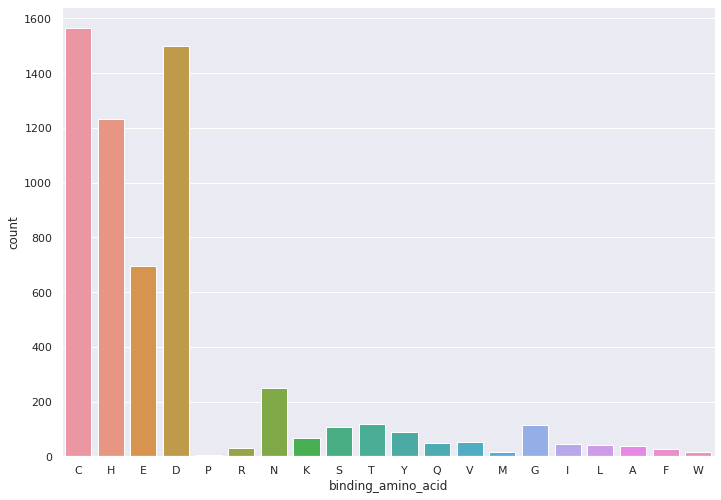

In [105]:
# plot for the previous counts
sns.countplot(x='binding_amino_acid', data=pos_train_both_based)

In [106]:
# ranking the combinations between binding metals and amino acids and thier occurance count
list_amino_acids = []
pos_train_both_based_temp = pos_train_both_based[~pos_train_comp_based.binding_amino_acid.isin(list_amino_acids)]

#pos_train_df1[pos_train_df1['Binding Amino Acid'] in ]
pos_train_both_based_temp = pos_train_both_based_temp.groupby(['binding_amino_acid', 'metal_name']).count().sort_values(['id'], ascending=False)
pos_train_both_based_temp = pos_train_both_based_temp.drop(['Position','window_3','window_10'], axis=1).rename(columns={'id':'metal_counts'}).reset_index()
#temp['metal_counts'] = temp['metal_counts'] /temp['metal_counts'].abs().max()
pos_train_both_based_temp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,binding_amino_acid,metal_name,metal_counts,sequence
0,C,Zn(2+),972,972
1,D,Ca(2+),721,721
2,H,Zn(2+),656,656
3,D,Mg(2+),304,304
4,E,Ca(2+),292,292
...,...,...,...,...
149,Q,Fe cation,1,1
150,Q,Na(+),1,1
151,Q,a divalent metal cation,1,1
152,R,Zn(2+),1,1


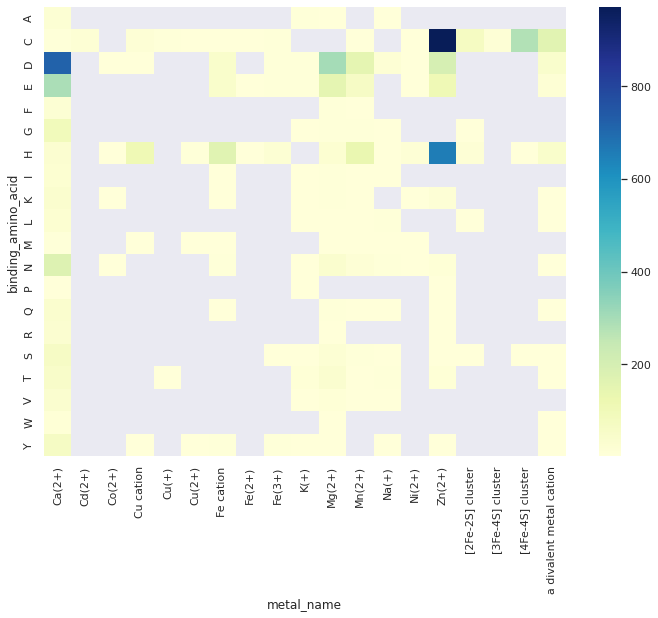

In [107]:
# Visualizing the combinations between binding metals and amino acids and thier occurance count
heatmap2 = pos_train_both_based_temp.pivot("binding_amino_acid", "metal_name", "metal_counts")
ax2 = sns.heatmap(heatmap2 , cmap="YlGnBu")

#### Plotting the Distribution (%) of metals for the Full Positive Dataset, Literature Based Instances, Computer Predicted dataset, and instances that has both evidences (literature and computer predictions) 

<AxesSubplot:xlabel='Metal names', ylabel='Percentage (%)'>

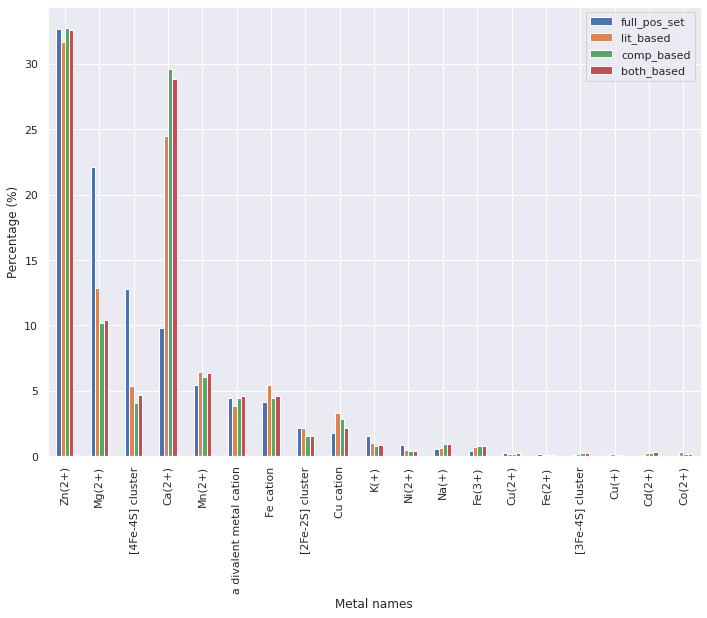

In [108]:
pd.DataFrame(counts_pos_full_1).reset_index().merge(
    pd.DataFrame(counts_lit_based_1).reset_index(), right_on='index', left_on='index').rename(
    columns={'metal_name_x':'full_pos_set', 'metal_name_y':'lit_based'}).merge(
    pd.DataFrame(counts_comp_based_1).reset_index(), right_on='index', left_on='index').rename(
    columns={'metal_name':'comp_based'}).merge(
    pd.DataFrame(counts_both_based_1).reset_index(), right_on='index', left_on='index').rename(
    columns={'metal_name':'both_based', 'index':'metal_name'}).plot(
    x="metal_name", y=["full_pos_set", "lit_based",'comp_based','both_based'], kind="bar",
    xlabel= 'Metal names', ylabel= "Percentage (%)")


#### Plotting the Distribution (%) of Amino Acids for the Full Positive Dataset, Literature Based Instances, Computer Predicted dataset, and instances that has both evidences (literature and computer predictions) 

<AxesSubplot:xlabel='Amino Acids ', ylabel='Percentage (%)'>

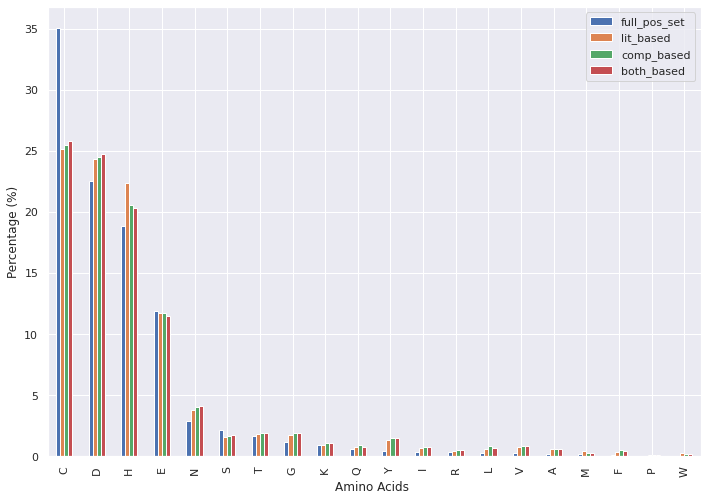

In [109]:
pd.DataFrame(counts_pos_full_2).reset_index().merge(
    pd.DataFrame(counts_lit_based_2).reset_index(), right_on='index', left_on='index').rename(
    columns={'binding_amino_acid_x':'full_pos_set', 'binding_amino_acid_y':'lit_based'}).merge(
    pd.DataFrame(counts_comp_based_2).reset_index(), right_on='index', left_on='index').rename(
    columns={'binding_amino_acid':'comp_based'}).merge(
    pd.DataFrame(counts_both_based_2).reset_index(), right_on='index', left_on='index').rename(
    columns={'binding_amino_acid':'both_based', 'index':'binding_amino_acid'}).plot(
    x="binding_amino_acid", y=["full_pos_set", "lit_based",'comp_based','both_based'], kind="bar",
    xlabel= 'Amino Acids ', ylabel= "Percentage (%)")


## Dataset Summary

| Info/Dataset | Pos_Train_Full | Pos_Train_literature_based | Pos_Train_computer_based | Pos_Train_both_based | Neg_Train
| --- | --- | --- | --- | --- | --- |
| Name in this Notebook | pos_train_full_df1 | pos_train_lit_based | pos_train_comp_based | pos_train_both_based | neg_train_df
| # of Instances | 399845 | 11169 | 6874 | 6056 | 193133
| # of Protiens  | 93894 | 2191 | 1203 | 1076 | 193133

By observing the last two charts and the summary dataset table, I have noticed the following:
* Very high percentage of the instances supported by computer-prediction already has a literature based evidence (6056/6874), which explains why in the charts the green and red columns are almost identical. In my opinion, this makes computer-predicted instances even more useless.
* In the Full_Pos_Train Dataset, there are five other evidences (other than literature and computer predictions), which explains the huge size of the dataset when compared to the aggregate of the literature based and computer-predict based. No documentation is provided by uniprot for the other evidences.
* Ca (+2) presence is interesting to observe when comparing the complete dataset with other subsets. It appears to be more abandunt or well annotated.
* Again, all amino acids except "C" have expressed consistent distribution across all datasets.
* All metals except Ca(+2), Mg(+2), [4Fe-4S] type also have consistent distribution across all datasets.


# Exploring datasets by amino acids types (charged, polar, amphipathic, hydrophobic)

In [110]:
amino_acids_types = {'charged': ['R','K','D','E'], 'polar':['Q','N','H','S','T','Y','C'],
               'amphipathic':['W','Y','M'], 'hydrophobic':['A','I','L','M','F','V','P','G']}

# function to explore any dataset by types
def metals_percent_by_types(df):
    counts_df = pd.DataFrame()
    for type in amino_acids_types:
        subset = df[df['binding_amino_acid'].isin(amino_acids_types[type])]
        counts = subset['metal_name'].value_counts()
        counts_df[type] = counts
    counts_df = (counts_df.div(counts_df.sum(axis=1), axis=0)*100).reset_index().rename(columns={'index':'metal_name'})
    
    #testing that all rows add up to 100 percent
    #counts_df['sum'] = counts_df.sum(axis = 1)
    counts_df.plot(y=['charged','polar','amphipathic','hydrophobic'] , x='metal_name', kind="bar", xlabel= 'Metals ', ylabel= "Percentage (%)")

    return counts_df
# function to explore the distribution of amino acids in types
def type_dist(df):
    counts_df = pd.DataFrame()
    for type in amino_acids_types:
        subset = df[df['binding_amino_acid'].isin(amino_acids_types[type])]
        counts = subset['metal_name'].value_counts()
        counts_df[type] = counts
    counts_df = counts_df.reset_index().rename(columns={'index':'metal_name'})
    counts_df = pd.DataFrame(counts_df.sum())
    counts_df = counts_df.drop(counts_df.index[[0]]).rename(columns={counts_df.columns[0]:'counts'})
    counts_df['%'] = counts_df['counts']/counts_df['counts'].sum()*100
    #counts_df.plot.pie(y='counts')
    return counts_df

In [111]:
# explore the distribution of amino acids in types in Literature Based Dataset
type_dist(pos_train_lit_based)

,counts,%
charged,4181,37.874808
polar,6036,54.678866
amphipathic,223.0,2.020111
hydrophobic,599.0,5.426216


In [112]:
# explore the distribution of amino acids in types in Literature Based Dataset
type_dist(pos_train_full_df1)

,counts,%
charged,142679,35.73246
polar,243693.0,61.030358
amphipathic,2673.0,0.669425
hydrophobic,10253.0,2.567756


,metal_name,charged,polar,amphipathic,hydrophobic
0,Ca(2+),59.400353,23.456790,4.303351,12.839506
1,Mg(2+),73.847213,18.031659,1.101170,7.019959
2,Zn(2+),15.697346,84.105025,0.112931,0.084698
3,Mn(2+),57.975035,39.251040,0.277393,2.496533
4,Fe cation,30.670927,66.134185,2.236422,0.958466
5,a divalent metal cation,33.796296,64.120370,0.925926,1.157407
6,Na(+),37.179487,30.769231,5.128205,26.923077
7,Fe(3+),19.811321,57.547170,22.641509,NaN
8,K(+),17.857143,35.714286,1.785714,44.642857
9,Co(2+),38.888889,61.111111,NaN,NaN


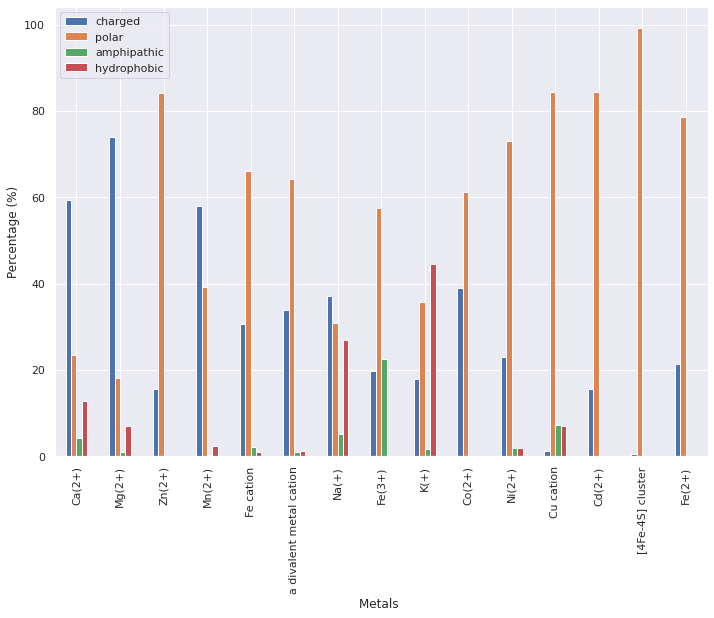

In [113]:
# Exploring Metal Percentages in Literature Dataset
metals_percent_by_types(pos_train_lit_based)

,metal_name,charged,polar,amphipathic,hydrophobic
0,Mg(2+),78.404704,18.394320,0.258471,2.942504
1,Ca(2+),64.603630,22.491469,3.422185,9.482716
2,Zn(2+),11.460149,88.422147,0.100125,0.017579
3,Mn(2+),59.437879,38.604736,0.045627,1.911758
4,a divalent metal cation,51.687598,47.348060,0.229872,0.734470
5,Fe cation,29.755056,68.874918,0.948935,0.421090
6,K(+),26.602254,41.159420,0.418680,31.819646
7,Ni(2+),23.010432,76.900149,0.059613,0.029806
8,[2Fe-2S] cluster,6.366018,93.588430,NaN,0.045553
9,[4Fe-4S] cluster,1.082382,98.913703,0.001957,0.001957


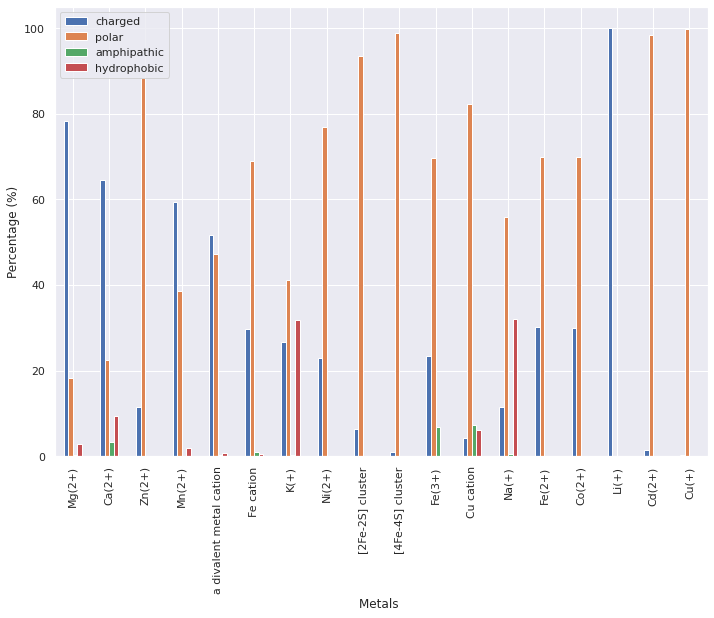

In [114]:
# Exploring Metal Percentages in  full train dataset
metals_percent_by_types(pos_train_full_df1)

**Key Findings:**
* Polar and Charged types represent the majority of instances in the data with percentages exceeding 80% for both datasets.
* Hydrophoic type is more likely to bind to K(+), Na(+), Ca(2+), Mg(2+) respectively.
* Both Datasets share the insight that amphipathic and hydrophopic types do not bind to Co(2+), Fe(2+), Cd(2+) 
* In literture-based dataset, although amphipathic type has small presentage, but it is more likely to bind to Fe(3+), Cu cation, and Ca(2+)